# An Image Classifer using CNN

A project to classify a 10 label dataset (60000 for training and 10000 for testing)

I have used the following architecture

#########################################

    The Train Data is split into ----> Validation + Train (0.33:0.67) where Train is again split into Train + Val (0.2:0.8)
    
    Both the Train and Test data are standardized
    
    The Labels are "ONE HOT ENCODED"
    
#########################################

#########################################
##### Model architecture

    Convolutional Layer (3x3)x16 RELU
    Convolutional Layer (3x3)x16 RELU

    MaxPool Layer (2x2)

    Convolutional Layer (5x5)x32 RELU
    Convolutional Layer (5x5)x32 RELU

    MaxPool Layer (2x2)

    Dropout Layer 0.3

    Dense Layer 1024 RELU

    Dense Layer 10 SOFTMAX
    
#########################################

#########################################
##### Model Optimization 
    
    Loss : Categorical Crossentropy
    Optimizer : ADAM
    Metric : Categorical Accuracy
    
#########################################
    
#########################################
##### Model Observations 

    Model starts to overfit after 8th epoch
    
    Model Training Accuracy : 95.11%
    
    Model Val Accuracy : 91.64%  <---- Split from X_train
    
    Model Validation : 91.621% <---- Split from Test Data

#########################################

## Importing required libraries

In [1]:
import numpy as np
# random seed for reproducibility
np.random.seed(123)

from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers
#Now we will import some utilities
from keras.utils import np_utils
#Fixed dimension ordering issue
from keras import backend as K
from keras.models import model_from_json

import keras

Using TensorFlow backend.


## Loading data

In [3]:
Train_data = np.load('training_data.npy')
Train_labels = np.load('training_label.npy')
Test_data = np.load('testing_data.npy')

## Preprocessing the data 

In [4]:
Train_data = Train_data - np.mean(Train_data) / Train_data.std()
Test_data = Test_data - np.mean(Test_data) / Test_data.std()
Train_labels = np_utils.to_categorical(Train_labels)

In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(Train_data, Train_labels, test_size=0.33, random_state=42)

In [6]:
num_classes=Train_labels.shape[1]

## Model


### Model Architecture

    Convolutional Layer (3x3)x16 RELU
    Convolutional Layer (3x3)x16 RELU
    
    MaxPool Layer (2x2)
    
    Convolutional Layer (5x5)x32 RELU
    Convolutional Layer (5x5)x32 RELU
    
    MaxPool Layer (2x2)

    Dropout Layer 0.3
    
    Dense Layer 1024 RELU
    
    Dense Layer 10 SOFTMAX

In [7]:
model=Sequential()

#Convolutional Layers 
model.add(Conv2D(16, (3,3), padding = 'same', strides = (1,1), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(16, (3,3), padding = 'same', strides = (1,1), activation='relu'))

#MaxPool Layer
model.add(MaxPooling2D(pool_size=(2,2),  strides = (2,2)))

#Convolutional Layers
model.add(Conv2D(32, (5,5),  strides = (1,1), activation='relu'))
model.add(Conv2D(32, (5,5),  strides = (1,1), activation='relu'))

#MaxPool Layer
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

#Dropout Layer
model.add(Dropout(0.3))      
model.add(Flatten())

#Dense Layer
model.add(Dense(1024,activation='relu'))

#Output Layer
model.add(Dense(num_classes, activation='softmax'))

W0721 17:36:48.834930 140182200805184 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 17:36:48.854800 140182200805184 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 17:36:48.857493 140182200805184 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 17:36:48.904760 140182200805184 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0721 17:36:48.950700 140182200805184 d

### Model Optimizers

Model Loss : Categorical Cross Entropy

Model Optimizer : ADAM
    
Model Metric : Categorical Accuracy

In [8]:
adam = keras.optimizers.Adam(lr=0.001)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics = [keras.metrics.categorical_accuracy])

W0721 17:36:49.081870 140182200805184 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 17:36:49.092873 140182200805184 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## Model Training

In [9]:
history =  model.fit(X_train, Y_train, validation_split = 0.2 , epochs=25, batch_size=200,verbose=1)

W0721 17:36:49.251431 140182200805184 deprecation.py:323] From /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 32160 samples, validate on 8040 samples
Epoch 1/25
32160/32160 [==============================] - 20s 631us/step - loss: 0.7762 - categorical_accuracy: 0.7162 - val_loss: 0.4825 - val_categorical_accuracy: 0.8182
Epoch 2/25
32160/32160 [==============================] - 19s 582us/step - loss: 0.4747 - categorical_accuracy: 0.8267 - val_loss: 0.4111 - val_categorical_accuracy: 0.8494
Epoch 3/25
32160/32160 [==============================] - 17s 539us/step - loss: 0.4010 - categorical_accuracy: 0.8530 - val_loss: 0.3575 - val_categorical_accuracy: 0.8706
Epoch 4/25
32160/32160 [==============================] - 19s 587us/step - loss: 0.3565 - categorical_accuracy: 0.8704 - val_loss: 0.3200 - val_categorical_accuracy: 0.8810
Epoch 5/25
32160/32160 [==============================] - 16s 502us/step - loss: 0.3323 - categorical_accuracy: 0.8785 - val_loss: 0.2901 - val_categorical_accuracy: 0.8923
Epoch 6/25
32160/32160 [==============================] - 18s 573us/step - loss: 0.307

## Model Evaluation

In [11]:
scores = model.evaluate(X_val, Y_val, verbose=0)

print(" CNN Validation set Loss : ", (scores[0]))
print(" CNN Validation set Accuracy : ", (scores[1]))

 CNN Validation set Loss :  0.24544540431764392
 CNN Validation set Accuracy :  0.9162121211880385


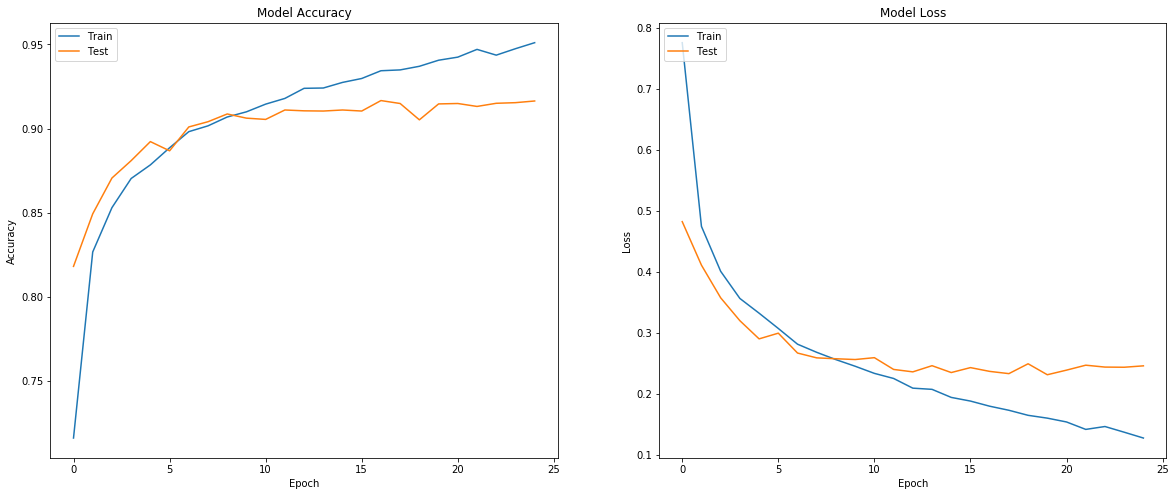

In [18]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(20,8))


ax0.plot(history.history['categorical_accuracy'])
ax0.plot(history.history['val_categorical_accuracy'])
ax0.set_title('Model Accuracy')
ax0.set_ylabel('Accuracy')
ax0.set_xlabel('Epoch')
ax0.legend(['Train', 'Test'], loc='upper left')


ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')


plt.show()

Observable that the model starts to over after **8th epoch**

## Training model on full Train set

In [13]:
model1=Sequential()

#Convolutional Layers 
model1.add(Conv2D(16, (3,3), padding = 'same', strides = (1,1), input_shape=(28,28,1), activation='relu'))
model1.add(Conv2D(16, (3,3), padding = 'same', strides = (1,1), activation='relu'))

#MaxPool Layer
model1.add(MaxPooling2D(pool_size=(2,2),  strides = (2,2)))

#Convolutional Layers
model1.add(Conv2D(32, (5,5),  strides = (1,1), activation='relu'))
model1.add(Conv2D(32, (5,5),  strides = (1,1), activation='relu'))

#MaxPool Layer
model1.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

#Dropout Layer
model1.add(Dropout(0.3))      
model1.add(Flatten())

#Dense Layer
model1.add(Dense(1024,activation='relu'))

#Output Layer
model1.add(Dense(num_classes, activation='softmax'))

In [14]:
adam = keras.optimizers.Adam(lr=0.001)

model1.compile(loss='categorical_crossentropy', optimizer=adam, metrics = [keras.metrics.categorical_accuracy])

In [15]:
history1 = model1.fit(Train_data, Train_labels, validation_split = 0.2 , epochs=10, batch_size=200,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 21s 435us/step - loss: 0.6983 - categorical_accuracy: 0.7427 - val_loss: 0.4475 - val_categorical_accuracy: 0.8301
Epoch 2/10
48000/48000 [==============================] - 24s 490us/step - loss: 0.4204 - categorical_accuracy: 0.8459 - val_loss: 0.3518 - val_categorical_accuracy: 0.8730
Epoch 3/10
48000/48000 [==============================] - 21s 439us/step - loss: 0.3590 - categorical_accuracy: 0.8703 - val_loss: 0.3124 - val_categorical_accuracy: 0.8886
Epoch 4/10
48000/48000 [==============================] - 21s 430us/step - loss: 0.3207 - categorical_accuracy: 0.8823 - val_loss: 0.2989 - val_categorical_accuracy: 0.8885
Epoch 5/10
48000/48000 [==============================] - 16s 335us/step - loss: 0.2930 - categorical_accuracy: 0.8924 - val_loss: 0.2712 - val_categorical_accuracy: 0.9032
Epoch 6/10
48000/48000 [==============================] - 14s 286us/step - loss: 0.27

Saving predicted values

In [16]:
Y_pred_raw = model1.predict(Test_data)
Y_pred_round = pd.DataFrame(Y_pred_raw).round(decimals = 0)
Y_pred = np.array((Y_pred_round.iloc[:,1:]==1).idxmax(1))


np.save('Labels.npy', Y_pred)

Saving model and weights

In [ ]:
model_json = model1.to_json()
with open("Final_model_json","w") as json_file:
    json_file.write(model_json)
    
model1.save_weights("Model_params.h5")